In [39]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from urllib.parse import urlencode
import requests
import json

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [40]:
# Загрузка данных из интернета
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/AGF4ETMHPXUPUw'

final_url = base_url + urlencode(dict(public_key=public_key)) 
request = requests.get(final_url)
download_link = json.loads(request.text)['href']

customers = pd.read_csv(download_link)

In [41]:
# Загрузка данных из интернета
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/b_mlVBHQgD4K_A'

final_url = base_url + urlencode(dict(public_key=public_key)) 
request = requests.get(final_url)
download_link = json.loads(request.text)['href']

order_items = pd.read_csv(download_link)

In [42]:
# Загрузка данных из интернета
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/I4dFvcYFA8jvqw'

final_url = base_url + urlencode(dict(public_key=public_key)) 
request = requests.get(final_url)
download_link = json.loads(request.text)['href']

orders = pd.read_csv(download_link)

-----

In [43]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [44]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [45]:
customers.shape

(99441, 5)

-----

In [46]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [47]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [48]:
order_items.shape

(112650, 7)

-----

In [49]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [50]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [51]:
orders.shape

(99441, 8)

-----

DTYPES
-----

customers — ok

order_items — нужно поменять формат колонок с датами на datetime

orders — нужно поменять формат колонок с датами на datetime

In [52]:
order_items.shipping_limit_date = order_items.shipping_limit_date.astype(dtype='datetime64')

In [53]:
orders = orders.astype(dtype={'order_purchase_timestamp': 'datetime64',
                              'order_approved_at': 'datetime64',
                              'order_delivered_carrier_date': 'datetime64',
                              'order_delivered_customer_date': 'datetime64',
                              'order_estimated_delivery_date': 'datetime64'})

In [54]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [55]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [56]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

DTYPES FIXED

-----

MERGE
-----

customers — orders

on: customer_id

•

orders — order_items

on: order_id

In [99]:
general_df = customers.merge(orders, on=['customer_id'], how='inner')

In [100]:
general_df = general_df.merge(order_items, on=['order_id'], how='inner')

In [101]:
general_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


general_df — merged dataframe

-----

CHECK NAN
-----

In [102]:
general_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [103]:
general_df.query('order_approved_at == "NaN"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
10188,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,1,02a79d79e818ad0be36cfc843a6af7ad,cb3dd9ce66268c7a3ca7241ac70ab58c,2017-02-25 10:04:19,28.99,10.96
15782,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77
23711,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1,c3b271f47e73d0c9ccf1b43b7606c705,cca3071e3e9bb7d12640c9fbe2301306,2017-01-29 22:26:59,45.90,14.52
25762,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,1,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,2017-02-28 14:52:27,59.90,17.16
31077,68d081753ad4fe22fc4d410a9eb1ca01,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,d69e5d356402adc8cf17e08b5033acfb,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,1,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,2017-02-26 01:28:47,149.80,13.63
44490,d85919cb3c0529589c6fa617f5f43281,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,3c0b8706b065f9919d0505d3b3343881,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20
47016,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 16:15:03,79.99,26.82
49905,684cb238dc5b5d6366244e0e0776b450,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,c1d4211b3dae76144deccd6c74144a88,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,1,5ab02ca028398131a5ae91401eb49788,80e6699fe29150b372a0c8a1ebf7dcc8,2017-01-23 12:48:08,39.99,14.52
59888,a3d3c38e58b9d2dfb9207cab690b6310,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2eecb0d85f281280f79fa00f9cec1a95,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23
67990,2127dc6603ac33544953ef05ec155771,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,e04abd8149ef81b95221e88f6ed9ab6a,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,1,0e20a07ca1714df21f9b07ca3bf7c682,4e7c18b98d84e05cbae3ff0ff03846c2,2017-02-22 13:40:00,309.90,39.11


In [104]:
general_df.query('order_delivered_carrier_date == "NaN"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35
146,faafae37ddb3e4af81c10a397bcca35f,1a7a10e9273fca58179bdd0d40843b0c,7243,guarulhos,SP,e9376d90b28f9cdea83d4d850e4bb1a7,invoiced,2017-09-01 15:02:24,2017-09-01 15:15:30,NaT,NaT,2017-09-15,1,391a014a66920fa0ce468319264e0232,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-09-11 15:15:30,129.90,9.72
281,3714eb406c7704a920e504085717ea5b,56d30b9f16c42d707d89967161296a04,84200,jaguariaiva,PR,fdd647b689626410b725d1cce2ddf37c,processing,2017-12-04 10:09:35,2017-12-27 14:03:00,NaT,NaT,2018-01-05,1,d983df6d3977955580e8585217b9ee42,48fb026ed7455a42f5d3e9390ed5088e,2018-01-03 14:03:00,30.99,15.10
424,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06,1,25179680ecacb54a036e9cdd27459da3,b7cc6c5e001441ae8cdd5c69a480cbe4,2018-02-05 22:32:39,199.00,83.25
426,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30,1,98354dc7140f034f3b55ec6fc45dd174,7bcd7c5f8631701474db233ccf1c094b,2017-06-23 14:23:18,72.00,11.73


In [105]:
general_df.query('order_delivered_customer_date == "NaN"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaT,2018-01-10,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27


Не стал дропать строки с NaN-значениями, так как они образовались из-за того, что заказы не были доставлены или в статусе отменённых.

-----

№1
-----

#### Сколько у нас пользователей, которые совершили покупку только один раз?

In [106]:
general_df.customer_unique_id.nunique()

95420

In [107]:
general_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [108]:
count_orders = general_df.query('order_status != "canceled" or order_status != "unavailable"') \
                         .groupby('customer_unique_id', as_index=False) \
                         .agg({'order_id' : 'nunique'})
count_orders

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1
95416,fffea47cd6d3cc0a88bd621562a9d061,1
95417,ffff371b4d645b6ecea244b27531430a,1
95418,ffff5962728ec6157033ef9805bacc48,1


Убрал все отмененные и недоступные заказы

In [109]:
count_result = count_orders.query('order_id == 1').shape[0]
print(count_result, 'пользователей совершили только одну покупку')

92507 пользователей совершили только одну покупку


-----

№2
-----

#### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [110]:
general_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [111]:
general_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [112]:
not_delivered = general_df.query('order_status == "canceled" or order_status == "unavailable"')
not_delivered['order_purchase_timestamp'] = general_df.order_purchase_timestamp.dt.strftime('%Y-%m')

C:\Users\vladislav\AppData\Local\Temp\ipykernel_3728\3732139722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
detailized_status_graphs = not_delivered.groupby(['order_status'], as_index=False, sort=True) \
                                 .agg({'order_id': 'count'})
detailized_status_graphs

,order_status,order_id
0,canceled,542
1,unavailable,7


In [114]:
fig = px.bar(detailized_status_graphs,
             x='order_status',
             y='order_id',
             title='Общий график недоставленных заказов')
fig.show()

In [115]:
not_delivered_mean_by_month = not_delivered.groupby(['order_status', 'order_purchase_timestamp'], as_index=False, sort=True) \
                                           .agg({'order_id': 'count'}) \
                                           .mean(numeric_only=True) \
                                           .round(2)
print(f'Среднее количество недоставленных заказов в месяц: {not_delivered_mean_by_month[0]}')

Среднее количество недоставленных заказов в месяц: 23.87


In [116]:
mean_canceled_status = not_delivered.query('order_status == "canceled"') \
                                    .groupby(['order_status', 'order_purchase_timestamp'], as_index=False, sort=True) \
                                    .agg({'order_id': 'count'}) \
                                    .mean(numeric_only=True) \
                                    .round(2)
print(f'Среднее количество недоставленных заказов в статусе "canceled" в месяц: {mean_canceled_status[0]}')

Среднее количество недоставленных заказов в статусе "canceled" в месяц: 24.64


In [117]:
mean_canceled_status = not_delivered.query('order_status == "unavailable"') \
                                    .groupby(['order_status', 'order_purchase_timestamp'], as_index=False, sort=True) \
                                    .agg({'order_id': 'count'}) \
                                    .mean(numeric_only=True) \
                                    .round(2)
print(f'Среднее количество недоставленных заказов в статусе "unavailable" в месяц: {mean_canceled_status[0]}')

Среднее количество недоставленных заказов в статусе "unavailable" в месяц: 7.0


------

№3
----
#### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [129]:
general_weekday_product = general_df.copy(deep=True)
general_weekday_product['weekday'] = general_df_task_3['order_purchase_timestamp'].dt.day_name()
general_weekday_product['weekday_num'] = general_df_task_3['order_purchase_timestamp'].dt.weekday

In [130]:
general_weekday_product['weekday']

0           Tuesday
1            Friday
2          Saturday
3           Tuesday
4            Sunday
            ...    
112645     Saturday
112646    Wednesday
112647       Sunday
112648       Friday
112649      Tuesday
Name: weekday, Length: 112650, dtype: object

In [131]:
general_weekday_product['product_id'].nunique()

32951

In [154]:
max_sales_on_product_per_weekday = general_weekday_product.groupby(['product_id', 'weekday'], as_index=False) \
    .order_id.count() \
    .set_index('weekday') \
    .groupby('product_id', as_index=False) \
    .order_id.idxmax()

In [155]:
max_sales_on_product_per_weekday

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


-----

№4
-----
#### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [86]:
copy_general_df = general_df.copy(deep=True)

In [87]:
copy_general_df.order_purchase_timestamp = copy_general_df.order_purchase_timestamp.dt.strftime('%Y-%m')

In [88]:
general_df_count_month = copy_general_df.groupby(["customer_unique_id", "order_purchase_timestamp"], as_index=False) \
                                   .agg({"customer_state": "count"})

In [89]:
general_df_count_month["weeks_in_month"] = general_df_count_month.order_purchase_timestamp

In [90]:
general_df_count_month["weeks_in_month"] = pd.to_datetime(general_df_count_month["weeks_in_month"]).dt.month

In [91]:
def num_of_weeks_in_month(month):
        if month == 2:
            days = 28
        elif month == 4:
            days = 30
        elif month == 6:
            days = 30
        elif month == 9:
            days = 30
        elif month == 11:
            days = 30
        else:
            days = 31
        return days 

In [92]:
general_df_count_month.weeks_in_month = general_df_count_month.weeks_in_month.apply(num_of_weeks_in_month)

In [93]:
general_df_count_month.weeks_in_month = (general_df_count_month.weeks_in_month / 7)

In [94]:
general_df_count_month = general_df_count_month.rename(columns = {'customer_state': 'purchase'})

In [95]:
general_df_count_month["mean_of_month_by_week"] = (general_df_count_month.purchase / general_df_count_month.weeks_in_month)

In [96]:
general_df_count_month

,customer_unique_id,order_purchase_timestamp,purchase,weeks_in_month,mean_of_month_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333
...,...,...,...,...,...
97314,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,4.285714,0.466667
97315,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571,0.225806
97316,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000,0.250000
97317,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571,0.225806


customer_unique_id — уникальный идентификатор пользователя

order_purchase_timestamp — время создания заказа

purchase — заказы

weeks_in_month — недель в месяц

mean_of_month_by_week — среднее количество заказов в месяц (по неделям)

In [97]:
general_df_count_for_graph = general_df_count_month.groupby(['order_purchase_timestamp'], as_index=False) \
                                                   .agg({'mean_of_month_by_week': 'mean'})
general_df_count_for_graph

,order_purchase_timestamp,mean_of_month_by_week
0,2016-09,0.466667
1,2016-10,0.268747
2,2016-12,0.225806
3,2017-01,0.285623
4,2017-02,0.285568
5,2017-03,0.260446
6,2017-04,0.265480
7,2017-05,0.260294
8,2017-06,0.265071
9,2017-07,0.262049


In [98]:
fig = px.bar(general_df_count_for_graph, x="order_purchase_timestamp", y="mean_of_month_by_week",
             title="Среднее количество заказов по средним на пользователя в месяц")
fig.show()

-----

№5
----
#### Проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [99]:
general_df_task_5 = general_df.copy(deep=True)

In [100]:
general_df_task_5

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [101]:
general_df_task_5 = general_df_task_5.query('order_delivered_customer_date != "NaT"')

In [102]:
general_df_task_5['period'] = general_df_task_5['order_delivered_customer_date'].dt.strftime('%Y-%m')

C:\Users\vladislav\AppData\Local\Temp\ipykernel_2556\1374810403.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
general_df_task_5

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,2018-04
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,2018-04
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,2018-05
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,2017-11


In [104]:
task_5_by_month = general_df_task_5.groupby(['period'], as_index=False) \
            .agg({'customer_unique_id':'count'}) \
            .sort_values('period') \
            .rename(columns={'customer_unique_id': 'count_orders'})

In [105]:
task_5_by_month

,period,count_orders
0,2016-10,245
1,2016-11,74
2,2016-12,4
3,2017-01,326
4,2017-02,1565
5,2017-03,2724
6,2017-04,2072
7,2017-05,4201
8,2017-06,3640
9,2017-07,3933


In [106]:
fig = px.line(task_5_by_month, x="period", y="count_orders",
             title="Покупки пользователей по месяцам")
fig.show()

In [107]:
general_df_task_5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08


In [108]:
first_order = general_df_task_5.groupby(['customer_unique_id'], as_index=False) \
                               .agg({'order_delivered_customer_date': 'min'}) \
                               .rename(columns = {'order_delivered_customer_date': 'first_purchase_date'})

In [109]:
first_order['first_purchase_date'] = first_order['first_purchase_date'].dt.strftime('%Y-%m')

In [110]:
first_order.head()

,customer_unique_id,first_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-04
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [111]:
pre_cohort = general_df_task_5.merge(first_order, on='customer_unique_id', how='inner')

In [112]:
pre_cohort = pre_cohort[['customer_unique_id', 'first_purchase_date', 'period']]

In [113]:
pre_cohort

,customer_unique_id,first_purchase_date,period
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-08,2018-08
...,...,...,...
110191,1a29b476fee25c95fbafc67c5ac95cf8,2018-04,2018-04
110192,d52a67c98be1cf6a5c84435bd38d095d,2018-04,2018-04
110193,e9f50caf99f032f0bf3c55141f019d99,2018-05,2018-05
110194,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11


In [114]:
pre_cohort_1 = pre_cohort.groupby(['first_purchase_date'], as_index=False)  \
                         .agg({'customer_unique_id': 'nunique'})  \
                         .rename(columns={'customer_unique_id': 'purchases_by_user'})

pre_cohort_2 = pre_cohort.merge(pre_cohort_1, on='first_purchase_date', how='left')

In [115]:
pre_cohort_2

,customer_unique_id,first_purchase_date,period,purchases_by_user
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,3673
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01,6401
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06,6565
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03,6564
4,345ecd01c38d18a9036ed96c73b8d066,2018-08,2018-08,8046
...,...,...,...,...
110191,1a29b476fee25c95fbafc67c5ac95cf8,2018-04,2018-04,7591
110192,d52a67c98be1cf6a5c84435bd38d095d,2018-04,2018-04,7591
110193,e9f50caf99f032f0bf3c55141f019d99,2018-05,2018-05,6879
110194,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11,4521


In [116]:
cohort = pre_cohort_2.groupby(['first_purchase_date', 'period'])  \
                .agg({'customer_unique_id': 'nunique', 'purchases_by_user': 'max'})  \
                .rename(columns={'customer_unique_id': 'customer_cohort'})

In [117]:
cohort = cohort.query('"2016-12" < first_purchase_date < "2018-01" and period < "2018-04"')

In [118]:
cohort.reset_index(inplace=True)

In [119]:
cohort

,first_purchase_date,period,customer_cohort,purchases_by_user
0,2017-01,2017-01,263,263
1,2017-01,2017-02,3,263
2,2017-01,2017-03,1,263
3,2017-01,2017-05,1,263
4,2017-01,2017-06,1,263
...,...,...,...,...
105,2017-11,2018-03,8,4521
106,2017-12,2017-12,6968,6968
107,2017-12,2018-01,36,6968
108,2017-12,2018-02,17,6968


In [120]:
cohort['CRR']=round(cohort.customer_cohort / cohort.purchases_by_user * 100, 2)
cohort

,first_purchase_date,period,customer_cohort,purchases_by_user,CRR
0,2017-01,2017-01,263,263,100.00
1,2017-01,2017-02,3,263,1.14
2,2017-01,2017-03,1,263,0.38
3,2017-01,2017-05,1,263,0.38
4,2017-01,2017-06,1,263,0.38
...,...,...,...,...,...
105,2017-11,2018-03,8,4521,0.18
106,2017-12,2017-12,6968,6968,100.00
107,2017-12,2018-01,36,6968,0.52
108,2017-12,2018-02,17,6968,0.24


In [121]:
def cohort_period(date):
    period = 0
    fpd = date.split('-')
    if fpd[0] == "2017":
        period = int(fpd[1])
    else:
        period = int(fpd[1])+12
    return(period)

cohort['cohort_period'] = cohort.period.apply(cohort_period)
cohort

,first_purchase_date,period,customer_cohort,purchases_by_user,CRR,cohort_period
0,2017-01,2017-01,263,263,100.00,1
1,2017-01,2017-02,3,263,1.14,2
2,2017-01,2017-03,1,263,0.38,3
3,2017-01,2017-05,1,263,0.38,5
4,2017-01,2017-06,1,263,0.38,6
...,...,...,...,...,...,...
105,2017-11,2018-03,8,4521,0.18,15
106,2017-12,2017-12,6968,6968,100.00,12
107,2017-12,2018-01,36,6968,0.52,13
108,2017-12,2018-02,17,6968,0.24,14


In [122]:
cohort.set_index(['first_purchase_date', 'cohort_period'], inplace=True)
cohorts_table = cohort['CRR'].unstack(1)

In [123]:
cohorts_table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_purchase_date,,,,,,,,,,,,,,,
2017-01,100.0,1.14,0.38,NaN,0.38,0.38,0.38,0.38,NaN,NaN,0.38,0.76,1.14,NaN,0.38
2017-02,NaN,100.00,0.68,0.23,0.30,0.30,0.15,0.15,0.23,0.08,0.08,0.15,0.38,0.23,0.15
2017-03,NaN,NaN,100.00,0.55,0.30,0.43,0.30,0.09,0.30,0.26,0.30,0.21,0.26,0.04,0.04
2017-04,NaN,NaN,NaN,100.00,0.78,0.28,0.22,0.28,0.17,0.28,0.06,0.39,0.22,0.28,0.11
2017-05,NaN,NaN,NaN,NaN,100.00,0.74,0.33,0.16,0.35,0.38,0.25,0.35,0.22,0.22,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.58,0.45,0.35,0.26,0.38,0.19,0.19,0.22
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.18,0.42,0.27,0.27,0.39,0.27,0.21
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.48,0.19,0.31,0.53,0.24,0.24
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,1.07,0.29,0.42,0.42,0.29,0.23


<Axes: title={'center': 'CRR'}, xlabel='cohort_period', ylabel='first_purchase_date'>

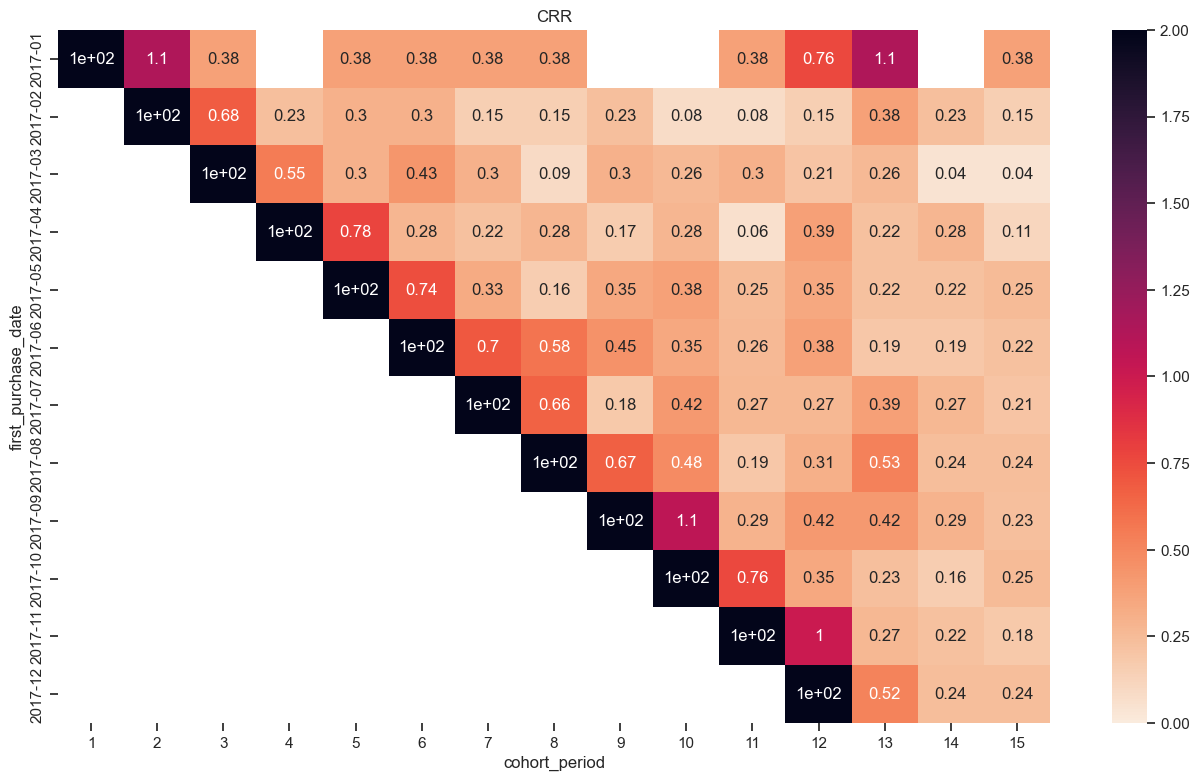

In [124]:
cmap = sns.cm.rocket_r
sns.set(style='ticks')
plt.figure(figsize=(16, 9))
plt.xlabel('Cohorts')
plt.title('CRR')
sns.heatmap(cohorts_table, annot=True, cmap=cmap, vmin=0, vmax=2, center=1)

Посмотрим на тепловую карту. CRR для всех когорт имеет очень низкие значения, не больше 1.2%.

Значения приближенные к 1.2% наблюдаются в первый месяц после первой покупки, дальше показатели снижаются. Исходя из этого, можем утверждать, что бизнес не способен удержать покупателей. 

Менее 1.2% пользователей совершают повторные покупки.

-----
Выявим когорту с наивысшим Retention Rate на 3 месяц.
-----

In [125]:
max_crr=cohort.copy()
max_crr.reset_index(inplace=True)

sp1 = []
sp2 = []
for i, row in max_crr.iterrows():
    coh=int(row['first_purchase_date'].split('-')[1])
    if row['cohort_period']==(coh+3):
        sp1.append(row['first_purchase_date'])
        sp2.append(row['CRR'])

In [126]:
df=pd.DataFrame({'coh': sp1, 'CRR': sp2})
print('Самый высокий Retention Rate был за:', df.loc[df['CRR'].idxmax()][0], '\n'
      'Его значение было:', df.loc[df['CRR'].idxmax()][1])

Самый высокий Retention Rate был за: 2017-06 
Его значение было: 0.45


-----

№6
-----

#### Построим RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [127]:
general_6 = general_df.copy(deep=True)

In [128]:
general_6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [129]:
general_6['delivered_date'] = general_6['order_delivered_customer_date'].dt.strftime('%Y-%m') 

In [130]:
delivered = general_6.query('order_delivered_customer_date != "NaT"')

In [131]:
month_delivered = delivered.groupby('delivered_date', as_index=False) \
                           .agg({'order_id': 'nunique', 'customer_unique_id': 'count'}) \
                           .rename(columns={'order_id': 'unique_orders',
                                            'customer_unique_id': 'count_customers'})

In [132]:
month_delivered.head()

,delivered_date,unique_orders,count_customers
0,2016-10,208,245
1,2016-11,60,74
2,2016-12,4,4
3,2017-01,283,326
4,2017-02,1351,1565


In [133]:
fig = px.line(month_delivered, x='delivered_date', y=['unique_orders', 'count_customers'])
fig.show()

In [134]:
period_orders = delivered.query('delivered_date > "2017-08" and delivered_date < "2018-09"')  \
                    .groupby(['order_id', 'order_delivered_customer_date', 'customer_unique_id'], as_index=False)  \
                    .agg({'price': 'sum'})
period_orders

,order_id,order_delivered_customer_date,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,58.90
1,000229ec398224ef6ca0657da4fc703e,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,199.00
2,00024acbcdf0a6daa1e931b038114c75,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12.99
3,00054e8431b9d7675808bcb819fb4a32,2017-12-18 22:03:38,635d9ac1680f03288e72ada3a1035803,19.90
4,000576fe39319847cbb9d288c5617fa6,2018-07-09 14:04:07,fda4476abb6307ab3c415b7e6d026526,810.00
...,...,...,...,...
75544,fffbee3b5462987e66fb49b1c5411df2,2018-07-05 17:51:08,ecc3d4eb9b17d2f0865d21f2abecc51c,119.85
75545,fffc94f6ce00a00581880bf54a75a037,2018-05-10 22:56:40,0c9aeda10a71f369396d0c04dce13a64,299.99
75546,fffcd46ef2263f404302a634eb57f7eb,2018-07-23 20:31:55,0da9fe112eae0c74d3ba1fe16de0988b,350.00
75547,fffce4705a9662cd70adb13d4a31832d,2017-10-28 12:22:22,cd79b407828f02fdbba457111c38e4c4,99.90


In [135]:
for_timedelta = period_orders['order_delivered_customer_date'].max() + datetime.timedelta(days=1)
for_timedelta

Timestamp('2018-09-01 23:58:27')

In [136]:
period_orders['days_after_last_order'] = period_orders['order_delivered_customer_date'].apply(lambda x: (for_timedelta - x).days)

In [137]:
period_orders

,order_id,order_delivered_customer_date,customer_unique_id,price,days_after_last_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,58.90,346
1,000229ec398224ef6ca0657da4fc703e,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,199.00,222
2,00024acbcdf0a6daa1e931b038114c75,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12.99,18
3,00054e8431b9d7675808bcb819fb4a32,2017-12-18 22:03:38,635d9ac1680f03288e72ada3a1035803,19.90,257
4,000576fe39319847cbb9d288c5617fa6,2018-07-09 14:04:07,fda4476abb6307ab3c415b7e6d026526,810.00,54
...,...,...,...,...,...
75544,fffbee3b5462987e66fb49b1c5411df2,2018-07-05 17:51:08,ecc3d4eb9b17d2f0865d21f2abecc51c,119.85,58
75545,fffc94f6ce00a00581880bf54a75a037,2018-05-10 22:56:40,0c9aeda10a71f369396d0c04dce13a64,299.99,114
75546,fffcd46ef2263f404302a634eb57f7eb,2018-07-23 20:31:55,0da9fe112eae0c74d3ba1fe16de0988b,350.00,40
75547,fffce4705a9662cd70adb13d4a31832d,2017-10-28 12:22:22,cd79b407828f02fdbba457111c38e4c4,99.90,308


In [138]:
RFM = period_orders.groupby('customer_unique_id', as_index=False)  \
            .agg({'days_after_last_order':'min',
                  'order_delivered_customer_date': 'count',
                 'price':'sum'})
RFM.rename(columns={'days_after_last_order': 'recency', 'order_delivered_customer_date': 'frequency', 'price':'monetary'}, inplace=True)
RFM

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00
...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89


In [139]:
level=[0.2, 0.4, 0.6, 0.8]
quantiles = RFM[['recency', 'frequency', 'monetary']].quantile(level).to_dict()
quantiles

{'recency': {0.2: 66.0, 0.4: 130.0, 0.6: 193.0, 0.8: 264.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.98, 0.8: 179.8}}

In [140]:
intervals_R=[0]
for i in range(len(quantiles['recency'])): 
    intervals_R.append(quantiles['recency'][level[i]])
intervals_R.append(RFM.recency.max())
RFM['R']=pd.cut(RFM.recency, intervals_R, labels=['5', '4', '3', '2', '1'])

In [141]:
RFM

,customer_unique_id,recency,frequency,monetary,R
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99,1
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00,1
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00,3
...,...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99,1
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00,2
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00,2
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89,2


In [142]:
RFM.loc[RFM.frequency==1].frequency.count() / RFM.frequency.count() * 100

97.48224924508284

In [143]:
intervals_F=[0, 3, 5, 7, 9, 12]
RFM['F']=pd.cut(RFM.frequency, intervals_F, labels=['1', '2', '3', '4', '5'])

In [144]:
intervals_M=[0]
for i in range(len(quantiles['monetary'])): 
    intervals_M.append(quantiles['monetary'][level[i]])
intervals_M.append(RFM.monetary.max())
RFM['M']=pd.cut(RFM.monetary, intervals_M, labels=['1','2','3','4','5'])

RFM

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99,1,1,1
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00,1,1,5
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00,3,1,4
...,...,...,...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99,1,1,2
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00,2,1,2
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00,2,1,4
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89,2,1,2


In [145]:
RFM = RFM.astype({'R':'string', 'F':'string', 'M':'string'})
RFM['RFM_score'] = RFM['R'] + RFM['F'] + RFM['M']
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99,1,1,1,111
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00,1,1,5,115
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00,3,1,4,314
...,...,...,...,...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99,1,1,2,112
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00,2,1,2,212
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00,2,1,4,214
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89,2,1,2,212


In [146]:
RFM.F.value_counts()

1    73490
2       23
3        3
4        1
5        1
Name: F, dtype: Int64

In [147]:
RFM['segment'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)

In [148]:
segment_map = {
    r'[1-2][1-2][1-2]': 'Hibernating',
    r'[1-2][1-2][3-4]': 'At Risk',
    r'[1-2][1-5]5': 'Can’t Lose Them',
    r'3[1-2][1-2]': 'About To Sleep',
    r'3[1-2]3': 'Customers Needing Attention',
    r'[3-4][1-5][4-5]': 'Loyal Customers',
    r'4[1-5]1': 'Potential Loyalist',
    r'5[1-5]1': 'Recent Customers',
    r'[4-5][1-5][2-3]': 'Promising',
    r'5[1-5][4-5]': 'Champions'}

RFM['segment'] = RFM['segment'].replace(segment_map, regex=True)
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90,4,1,4,414,Loyal Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411,Potential Loyalist
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99,1,1,1,111,Hibernating
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00,1,1,5,115,Can’t Lose Them
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00,3,1,4,314,Loyal Customers
...,...,...,...,...,...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99,1,1,2,112,Hibernating
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00,2,1,2,212,Hibernating
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00,2,1,4,214,At Risk
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89,2,1,2,212,Hibernating


Hibernating (Бездействующие) — покупали давно, мало заказов, маленькая выручка 

At Risk (В зоне риска) — покупали давно, мало заказов, средняя выручка

Can’t Lose Them (Нельзя потерять) — покупали давно, много заказов, высокая выручка

About To Sleep (Собираются уходить) — покупали относительно недавно, много заказов, маленькая выручка 

Customers Needing Attention (Требующие внимания) — покупали относительно недавно, мало заказов, средняя выручка 

Loyal Customers (Постоянные покупатели) — покупали относительно недавно, много заказов, высокая выручка 

Potential Loyalist (Потенциально лояльные) — покупали недавно, много заказов, маленькая выручка 

Recent Customers (Недавние покупатели) — покупали недавно, много заказов, маленькая выручка

Promising (Многообещающие) — покупали недавно, много заказов, средняя выручка 

Champions (Чемпионы) — покупали недавно, много заказов, высокая выручка

-----

In [149]:
segmentation = RFM.groupby('segment', as_index=False)  \
                  .agg({'customer_unique_id':'count'}) \
                  .rename(columns={'customer_unique_id':'count_customer'}) \
                  .sort_values('count_customer', ascending=False)
segmentation

,segment,count_customer
5,Hibernating,12237
6,Loyal Customers,11996
8,Promising,11444
1,At Risk,11362
0,About To Sleep,6155
3,Champions,6027
2,Can’t Lose Them,5740
9,Recent Customers,3108
7,Potential Loyalist,2847
4,Customers Needing Attention,2602


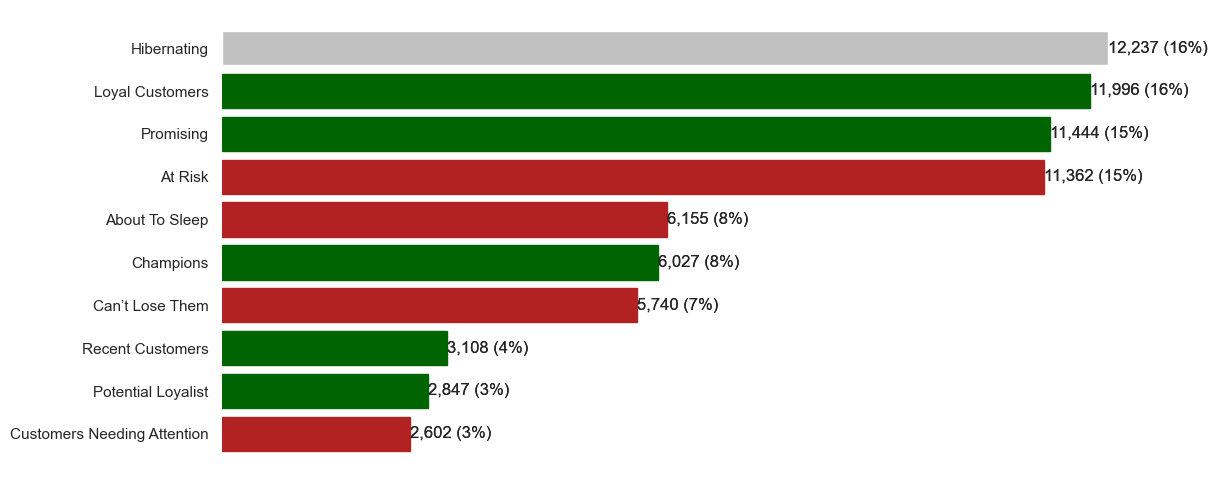

In [150]:
segments_counts = RFM['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Champions', 'Loyal Customers', 'Promising', 'Recent Customers', 'Potential Loyalist']:
            bar.set_color('#006400')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
        
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['At Risk', 'Can’t Lose Them', 'Customers Needing Attention', 'About To Sleep']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [151]:
def description(score):
    r = int(score[0])
    f = int(score[1])
    m = int(score[2])
    rstr = "от " + str(intervals_R[r-1]) + " до " + str(intervals_R[r]) + " дней с даты последней покупки "
    fstr = "от " + str(intervals_F[f-1]) + " до " + str(intervals_F[f]) + " покупок в год "
    mstr = "от " + str(intervals_M[m-1]) + " до " + str(intervals_M[m]) + " руб. в год "
    return ("Границы метрик R: " + rstr + " F: "+ fstr+ " M: "+ mstr)

RFM['description_intervals'] = RFM['RFM_score'].apply(description) 
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment,description_intervals
0,0000366f3b9a7992bf8c76cfdf3221e2,108,1,129.90,4,1,4,414,Loyal Customers,Границы метрик R: от 193.0 до 264.0 дней с дат...
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411,Potential Loyalist,Границы метрик R: от 193.0 до 264.0 дней с дат...
2,0000f6ccb0745a6a4b88665a16c9f078,304,1,25.99,1,1,1,111,Hibernating,Границы метрик R: от 0 до 66.0 дней с даты пос...
3,0004aac84e0df4da2b147fca70cf8255,278,1,180.00,1,1,5,115,Can’t Lose Them,Границы метрик R: от 0 до 66.0 дней с даты пос...
4,0004bd2a26a76fe21f786e4fbd80607f,147,1,154.00,3,1,4,314,Loyal Customers,Границы метрик R: от 130.0 до 193.0 дней с дат...
...,...,...,...,...,...,...,...,...,...,...
73513,fffa431dd3fcdefea4b1777d114144f2,295,1,64.99,1,1,2,112,Hibernating,Границы метрик R: от 0 до 66.0 дней с даты пос...
73514,fffb09418989a0dbff854a28163e47c6,249,1,58.00,2,1,2,212,Hibernating,Границы метрик R: от 66.0 до 130.0 дней с даты...
73515,fffbf87b7a1a6fa8b03f081c5f51a201,229,1,149.00,2,1,4,214,At Risk,Границы метрик R: от 66.0 до 130.0 дней с даты...
73516,fffea47cd6d3cc0a88bd621562a9d061,235,1,64.89,2,1,2,212,Hibernating,Границы метрик R: от 66.0 до 130.0 дней с даты...


In [152]:
pd.set_option('display.max_colwidth', None)
    
RFM.groupby(['RFM_score', 'segment', 'description_intervals'], as_index=False)  \
   .agg({'customer_unique_id':'count'})  \
   .rename(columns={'customer_unique_id': 'count_customers'})

,RFM_score,segment,description_intervals,count_customers
0,111,Hibernating,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 0 до 39.9 руб. в год,2940
1,112,Hibernating,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 39.9 до 69.9 руб. в год,3248
2,113,At Risk,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 69.9 до 109.98 руб. в год,2808
3,114,At Risk,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 109.98 до 179.8 руб. в год,2729
4,115,Can’t Lose Them,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 179.8 до 13440.0 руб. в год,2951
5,125,Can’t Lose Them,Границы метрик R: от 0 до 66.0 дней с даты последней покупки F: от 3 до 5 покупок в год M: от 179.8 до 13440.0 руб. в год,2
6,211,Hibernating,Границы метрик R: от 66.0 до 130.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 0 до 39.9 руб. в год,3018
7,212,Hibernating,Границы метрик R: от 66.0 до 130.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 39.9 до 69.9 руб. в год,3031
8,213,At Risk,Границы метрик R: от 66.0 до 130.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 69.9 до 109.98 руб. в год,2917
9,214,At Risk,Границы метрик R: от 66.0 до 130.0 дней с даты последней покупки F: от 0 до 3 покупок в год M: от 109.98 до 179.8 руб. в год,2908


-----